# Prueba y Estimación

## 04-01 Prueba y Estimación
1. ¿Qué es una prueba?
* Hipótesis alternativa: $ H_1 $
* Hipótesis nula: $ H_0 $
* Hipótesis bilateral
* Hipótesis unilateral
* Prueba bilateral
* Prueba unilateral
* Error de tipo I : Error de precipitación
* Nivel de significancia
* Nivel de riesgo
* Error de tipo II : Error de omisión
* Potencia de la prueba $ (1-\beta) $

2. Procedimiento de la prueba

Paso 1: Establecimiento de la hipótesis de la prueba

Paso 2: Establecimiento de la hipótesis nula $ H_0 $ y la hipótesis alternativa $ H_1 $

Paso 3: Selección del estadístico de prueba
* En la prueba de la media de una población, cuando la varianza de la población es conocida, la población sigue una distribución normal $ N(\mu, \sigma^2) $. La media de una muestra de tamaño $ n $ extraída de esta población sigue una distribución normal $ N(\mu, \sigma^2 / n) $. Al estandarizar esto $ u= \frac{\bar{x} - \mu}{\sqrt{\sigma^2/n}}$ sigue una distribución normal estándar $ N(0, 1^2) $.

Paso 4: Establecimiento del nivel de significancia

Paso 5: Establecimiento de la región de rechazo

Paso 6: Cálculo del estadístico de prueba

Paso 7: Decisión sobre el resultado de la prueba
* Calcula el valor de la estadística de prueba y compáralo con el valor de área de rechazo para tomar una decisión sobre la prueba. Si el valor está dentro del área de rechazo, se considera significativo; si no lo está, se considera no significativo.

Paso 8: Concusión
* Como resultado de la prueba, si es significativo, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Si no es significativo, la hipótesis nula no se rechaza.

3. ¿Qué es una estimación?
* La estimación consiste en estimar los parámetros de la población, como la media poblacional o la varianza poblacional, de una distribución de la población objetivo. Existen dos tipos de estimación: la estimación puntual, que estima el parámetro utilizando un solo estimador, y la estimación por intervalo, que estima el parámetro utilizando un intervalo. En la estimación por intervalo, el ancho del intervalo (intervalo de confianza) se determina en función de la tasa de confianza $ (1-\alpha) $, que es la probabilidad de que el intervalo contenga el verdadero parámetro de la población. El límite superior del intervalo de confianza se llama límite superior de confianza y el límite inferior se llama límite inferior de confianza.

4. Procedimiento de la estimación

Paso 1: Estimación puntual
* La estimación puntual consiste en inferir parámetros como la media poblacional $ \mu $ o la varianza poblacional $ \sigma^2 $ mediante un único valor. Se utilizan estimadores insesgados como la media muestral $ \bar{x} $ y la varianza muestral $ V $.
* $ \hat{x} = \bar{\mu} $

Paso 2: Estimación por intervalo
* Variable aleatoria $ u = \frac{\bar{x} - \mu}{\sqrt{\sigma^2}/n}$
* Límite superior de confianza $ \mu_U = \bar{x} + u(0.05) \sqrt{\sigma^2/n} $
* Límite inferior de confianza $ \mu_L = \bar{x} - u(0.05) \sqrt{\sigma^2/n} $

In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 04-02 Pruebas y estimaciones basadas en datos de valores medibles

### Pruebas y estimaciones sobre una o dos poblaciones

* Distribución normal estándar
* Distribución t
* Distribución ji-cuadrado
* Prueba de Welch
* Distribución F

### Pruebas sobre varianzas de tres o más poblaciones

* Prueba de Cochran


## 4.1

５か所の分析センターで、廃液中成分Gの含有量の分析を行っている。今回、同一サンプルを用い各分析センターでそれぞれ５回の測定を行ったところ、以下の分散（単位：％＾２）が得られた。各センターでの測定値のバラつきが一様であるか検討せよ。

V1=0.50、V2=0.68、V3=0.23、V4=0.89、V5=0.71

En cinco centros de análisis se está llevando a cabo el análisis del contenido del componente G en el efluente residual. En esta ocasión, se realizó la medición en cada centro de análisis cinco veces utilizando la misma muestra, y se obtuvieron las siguientes varianzas (unidad: %^2). Examine si la variabilidad en los valores medidos en cada centro es uniforme.

V1=0.50, V2=0.68, V3=0.23, V4=0.89, V5=0.71

#### Note:
Si los datos siguen una distribución normal, la prueba de Bartlett tiene una mayor potencia estadística.

En cambio, si los datos no siguen una distribución normal o si son sensibles a la influencia de valores atípicos, la prueba de Cochran puede ofrecer resultados más estables, lo que aumenta la probabilidad de mantener la potencia estadística.


In [3]:
from scipy import stats

# Varianzas obtenidas en cada centro
variances = np.array([0.50, 0.68, 0.23, 0.89, 0.71])

# Bartlett's Test
statistic, p_value = stats.bartlett(variances, variances, variances, variances, variances)

# Visualización de los resultados
print(f"Estadístico de prueba: {statistic}")
print(f"Valor p: {p_value}")

# Juicio basado en el valor p
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hip+otesis nula. Se concluye que las  varianzas no son uniformes.")
else:
    print("No se puede rechazar la hipótesis nula. Se concluye que las varianzas son uniformes.")


Estadístico de prueba: 6.4594794160009106e-15
Valor p: 1.0
No se puede rechazar la hipótesis nula. Se concluye que las varianzas son uniformes.


In [4]:
from scipy.stats import chi2

# Varianzas obtenidas en cada centro
variances = np.array([0.50, 0.68, 0.23, 0.89, 0.71])

# Cálculo del estadístico C de Cochran
V_max = np.max(variances)  # Varianza máxima
V_min = np.min(variances)  # Varianza mínima
V_total = np.sum(variances)  # Suma total

# Calcular el valor del estadístico C
C_statistic = V_max / V_total

# Cálculo de los grados de libertad
k = len(variances)  # Número de centros
df = k - 1  # Grados de libertad

# En la prueba de Cochran, se calcula el valor crítico para comparar el valor de C
alpha = 0.05  # Nivel de significancia
critical_value = chi2.ppf(1 - alpha, df)

# Visualización de los resultados
print(f"Estadístico C: {C_statistic}")
print(f"Valor crítico: {critical_value}")

# Cálcular de p
p_value = 1 - chi2.cdf(C_statistic * df, df)

print(f"Valor p: {p_value}")

# Juicio basado en los resultados
if C_statistic > critical_value:
    print("Se rechaza la hipótesis nula. concluyendo que las varianzas no son uniformes.")
else:
    print("No se puede rechazar la hipótesis nula, concluyendo que las varianzas son uniformes.")


Estadístico C: 0.2956810631229236
Valor crítico: 9.487729036781154
Valor p: 0.8809346846074432
No se puede rechazar la hipótesis nula, concluyendo que las varianzas son uniformes.


###  Potencia de la prueba sobre la media poblacional

## 4.2

Q繊維の引張強度の母平均は50.0(MPa)。母分散は3.0^2(MPa)^2であった。今回、引張強度の向上を目的に新規開発を行い、試作品の強度を測定した。母分散は変化しないもとのして、引張強度が大きくなったかどうか検定する。以下の設問に答えよ。ただし、有意水準α=0.05とする。
1. 試作品9個の強度を測定した。開発品の母平均が53.0(MPa)の時の検出力（１－β）を求めよ。
2. 開発品の母平均が52.0(MPa)の時、検出力（1－β）=0.90以上で検出したいとする。このとき必要な試作品の個数（サンプルの大きさｎ）を求めよ。

La resistencia a la tracción media de la fibra Q es de 50.0(MPa), y la varianza poblacional es de $ 3.0^2 (MPa)^2 $. Se ha realizado un desarrollo con el objetivo de mejorar la resistencia a la tracción y se ha medido la resistencia de los prototipos. Suponiendo que la varianza poblacional no cambia, se debe verificar si la resistencia a la tracción ha aumentado. Responde las siguientes preguntas, considerando un nivel de significancia $ \alpha = 0.05 $.
1. Se midió la resistencia de 9 prototipos. Calcula el poder de la prueba $ (1-\beta) $ cuando la media poblacional del nuevo desarrollo es de 53.0(MPa).
2. Si la media poblacional del nuevo desarrollo es de 52.0 (MPa), se desea que el poder de la prueba sea al menos $ (1-\beta) = 0.90 $. Calcula el tamaño de la muestra (n) necesario para lograrlo.


In [5]:
import scipy.stats as stats

# 1. Condiciones establecidas
mu_0 = 50.0  # Media de la hipótesis nula
sigma = 3.0  # Desviación estándar de la población
alpha = 0.05  # Nivel de significancia

# 1-1. Cálculo de la potencia cuando la media del producto es 53.0
mu_1 = 53.0  # Media bajo la hipóesis alternativa
n = 9  # Tamaño de la muestra

# Error estándar y valor crítico
standard_error = sigma / np.sqrt(n)
z_alpha = stats.norm.ppf(1 - alpha)
z_beta = (mu_0 + z_alpha * standard_error - mu_1) / standard_error
beta = stats.norm.cdf(z_beta)
power = 1 - beta

print(f"Potencia (1 - β) cuando la media del producto es 53.0: {power:.4f}")

# 2. Cálculo del tamaño de muestra necesario para un apotencia de 0.90 cuando la media es 52.0
mu_2 = 52.0
power_target = 0.90

# Búsqueda iterativa del tamaño de la muestra
def find_sample_size(mu_0, mu_2, sigma, alpha, power_target):
    n = 1
    while True:
        standard_error = sigma / np.sqrt(n)
        z_alpha = stats.norm.ppf(1 - alpha)
        z_beta = (mu_0 + z_alpha * standard_error - mu_2) / standard_error
        beta = stats.norm.cdf(z_beta)
        power = 1 - beta
        if power >= power_target:
            return n, power
        n += 1

n_required, final_power = find_sample_size(mu_0, mu_2, sigma, alpha, power_target)

print(f"Tamaño de muestra necesario para una potencia de 0.90 con una media de 52.0: {n_required}")


Potencia (1 - β) cuando la media del producto es 53.0: 0.9123
Tamaño de muestra necesario para una potencia de 0.90 con una media de 52.0: 20


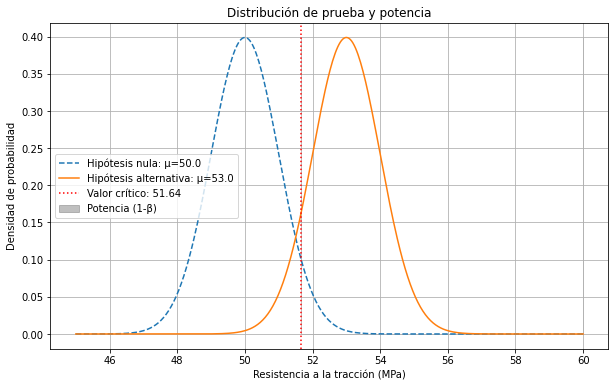

In [6]:
# グラフの作成
x = np.linspace(45, 60, 400)
null_dist = stats.norm.pdf(x, mu_0, sigma / np.sqrt(n))
alternative_dist = stats.norm.pdf(x, mu_1, sigma / np.sqrt(n))

# 臨界値の計算
critical_value = mu_0 + z_alpha * standard_error

plt.figure(figsize=(10, 6))
plt.plot(x, null_dist, label='Hipótesis nula: μ=50.0', linestyle='dashed')
plt.plot(x, alternative_dist, label='Hipótesis alternativa: μ=53.0', linestyle='solid')
plt.axvline(critical_value, color='red', linestyle='dotted', label=f'Valor crítico: {critical_value:.2f}')
plt.fill_betweenx(null_dist, critical_value, x[-1], color='gray', alpha=0.5, label='Potencia (1-β)')
plt.title('Distribución de prueba y potencia')
plt.xlabel('Resistencia a la tracción (MPa)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### Potencia de la prueba sobre la varianza poblacional

## 4.3

プラスチック製品Pの延性の母分散は3.0^2であった。ばらつきの低減を狙い、試作品を作成した。以下の設問に答えよ。
1. 試作品１１個の延性を測定した。改善後の母分散が1.5^2(%^2)のときの検出力（１－β）を求めよ。
2. 改善後の母分散が1.8^2(%^2)のとき、検出力（１－β）=0.90以上で検出したいとする。このとき必要な試作品の個数（サンプルサイズの大きさｎ）を求めよ。

La varianza poblacional de la ductilidad del producto de plástico P fue $ 3.0^2  $ (%^2) . Se creó un prototipo con el objetivo de reducir la variabilidad. Responde a las siguientes preguntas:
1. Se midió la ductilidad de 11 prototipos. Calcula la potencia $ (1-\beta) $ cuando la varianza poblacional mejorada es $ 1.5^2 $ (%^2)
2. Si la varianza poblacional mejorada es $ 1.8^2 $ (%^2) y se requiere una potencia $ (1-\beta) \ge 0.90 $ para detectar, ¿cuál es el tamaño de muestra necesario?



Potencia (1 - β) cuando la varianza es 1.5²: 0.9176
Tamaño de muestra necesario para una potencia de 9 con varianza de 1.8²: 18


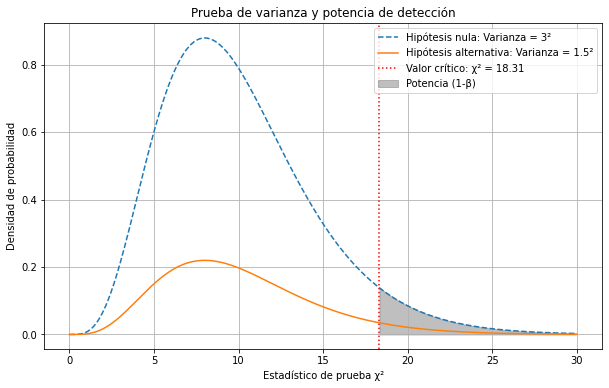

In [7]:
import scipy.stats as stats

# Condiciones iniciales
sigma_0_squared = 3**2  # Varianza poblacional original
alpha = 0.05  # Nivel de significancia
n = 11  # Número de muestras

# 1. Cálculo del poder（1-β）cuando la varianza poblacional espués de la mejora es 1.5
sigma_1_squared = 1.5**2
chi2_critical = stats.chi2.ppf(1 - alpha, df=n-1)
chi2_statistic = chi2_critical * sigma_1_squared / sigma_0_squared
beta = stats.chi2.cdf(chi2_statistic, df=n-1)
power = 1 - beta
print(f"Potencia (1 - β) cuando la varianza es 1.5²: {power:.4f}")

# 2. Cálculo del tamaño de muestra necesario（cuando la varianza poblacional de la mejore es 1.8² y el poder es superior a 0.90)
sigma_2_squared = 1.8**2
power_target = 0.90

# Explorando el tamaño de muestra adecuado
def find_sample_size(sigma_0_sq, sigma_2_sq, alpha, power_target):
    for n in range(2, 100):
        chi2_critical = stats.chi2.ppf(1 - alpha, df=n-1)
        chi2_statistic = chi2_critical * sigma_2_sq / sigma_0_sq
        beta = stats.chi2.cdf(chi2_statistic, df=n-1)
        power = 1 - beta
        if power >= power_target:
            return n, power
    return None, None

n_required, final_power = find_sample_size(sigma_0_squared, sigma_2_squared, alpha, power_target)
if n_required:
    print(f"Tamaño de muestra necesario para una potencia de 9 con varianza de 1.8²: {n_required}")
else:
    print("No se encontró un tamaño de muestra adecuado dentro del rango buscado.")

# Creación del gráfico
x = np.linspace(0, 30, 500)
chi2_null = stats.chi2.pdf(x, df=n-1) * sigma_0_squared
chi2_alternative = stats.chi2.pdf(x, df=n-1) * sigma_1_squared

plt.figure(figsize=(10, 6))
plt.plot(x, chi2_null, label=f'Hipótesis nula: Varianza = 3²', linestyle='dashed')
plt.plot(x, chi2_alternative, label=f'Hipótesis alternativa: Varianza = 1.5²', linestyle='solid')
plt.axvline(chi2_critical, color='red', linestyle='dotted', label=f'Valor crítico: χ² = {chi2_critical:.2f}')
plt.fill_between(x, chi2_null, where=(x >= chi2_critical), color='gray', alpha=0.5, label='Potencia (1-β)')
plt.title('Prueba de varianza y potencia de detección')
plt.xlabel('Estadístico de prueba χ²')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


## 04-03 Pruebas y estimaciones basadas en datos de conteo

1. Análisis del número y la tasa de productos no conformes (número y tasa de defectuosos)
* Prueba y estimación de la tasa de productos defectuosos P en una población.
* Prueba y estimación de la diferencia entre las tasas de productos defectuosos $ P_A $ y $ P_B $ en dos poblaciones.

2. Análisis del número de no conformidades(número de defectos)
* Prueba y estimación del número de defectos $ \lambda $ en una población.
* Prueba y estimación de la diferencia entre los números de defectos $ \lambda_A $ y $ \lambda_B $ en dos poblaciones.

3. Análisis de datos de frecuencias clasificados por categoría
* Prueba de bondad de ajuste
* Prueba mediante tabla de contingencia


4. Prueba de bondad de ajuste

## 4.4
工場の一日ごとのチョコ停回数を１００日間にわたって調査した（表４．８）。チョコ停の回数の分布がポワソン分布に従うかどうか検討せよ。

Se realizó una investigación sobre el número de paradas pequeñas diarias en la fábrica durante 100 días (Tabla 4.8). Se debe examinar si la distribución del número de paradas pequeñas sigue una distribución de Poisson.

In [8]:
import pandas as pd
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet9") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df = df.T
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.set_index(df.columns[0])

print(df.T)
df.T.to_excel("Data_1/Tabla_4_8.xlsx")

df = df.reset_index(drop=True)
df.columns = ["s","d"]
df[["s","d"]] = df[["s","d"]].apply(pd.to_numeric)

data = df.copy()

                  Número de paradas pequñas               
0                                                         
Número de paradas                         0   1   2   3  4
Día                                      10  20  30  40  0


In [9]:
import scipy.stats as stats

ram = np.sum(df['d']*df['s'])/np.sum(df['d'])

df["Poisson"] = stats.poisson.pmf(df["s"],ram)
df.loc[4,"Poisson"] = 1 - df["Poisson"].iloc[0:4].sum()
df["ti"] = (df["Poisson"]*np.sum(df['d'])).round(2)
df["(xi-ti)^2/ti"] = ((df["d"]-df["ti"])**2)/df["ti"]
df.loc["Total"] = df.sum()
df

,s,d,Poisson,ti,(xi-ti)^2/ti
0,0.0,10.0,0.135335,13.53,0.920983
1,1.0,20.0,0.270671,27.07,1.846505
2,2.0,30.0,0.270671,27.07,0.317137
3,3.0,40.0,0.180447,18.04,26.731796
4,4.0,0.0,0.142877,14.29,14.290000
Total,10.0,100.0,1.000000,100.00,44.106421


In [10]:
# Definición de los datos
data = data

# Obtención de las veces de paradas menores y su frecuencia
choco_counts = data['s']
frequency = data['d']

# Cálculo de la tasa de ocurrencia media（lambda）
total_days = sum(frequency)
mean_lambda = sum([choco_counts[i] * frequency[i] for i in range(len(choco_counts))]) / total_days

# Cálculo del valor esperado según la distribución de Poisson
# Ajuste del total correspondiente a la parte de 4 o más
expected_counts = [stats.poisson.pmf(k, mean_lambda) * total_days for k in range(max(choco_counts))]
expected_counts.append(total_days - sum(expected_counts))

# Visualización de los valores observados y esperados
print("\nValores observados:", frequency)
print("Valores esperados:", [round(e, 2) for e in expected_counts])

# Realización de la prueba de chi-cuadrado
chi2_stat, p_value = stats.chisquare(f_obs=frequency, f_exp=expected_counts)

# Visualización de los resultados
print("\nEstadístico de prueba chi-cuadrado:", round(chi2_stat, 2))
print("Valor p:", p_value)

if p_value > 0.05:
    print("Estos datos se consideran que siguen una distribución de Poisson")
else:
    print("Estos datos no se consideran que siguen una distribución de Poisson")






Valores observados: 0    10
1    20
2    30
3    40
4     0
Name: d, dtype: int64
Valores esperados: [13.53, 27.07, 27.07, 18.04, 14.29]

Estadístico de prueba chi-cuadrado: 44.09
Valor p: 6.155486484248077e-09
Estos datos no se consideran que siguen una distribución de Poisson


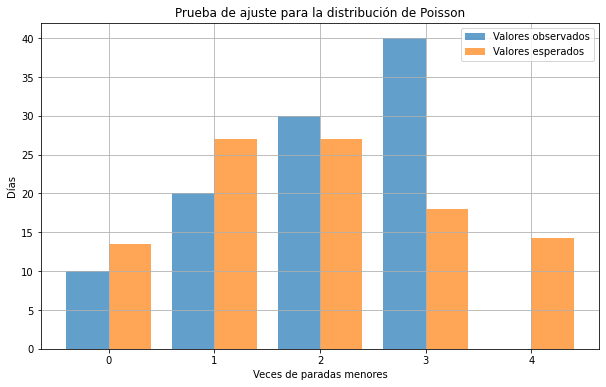

In [11]:
#
plt.figure(figsize=(10, 6))

x = np.array(choco_counts)
plt.bar(x - 0.2, frequency, width=0.4, label='Valores observados', alpha=0.7)
plt.bar(x + 0.2, expected_counts, width=0.4, label='Valores esperados', alpha=0.7)
plt.xlabel('Veces de paradas menores')
plt.ylabel('Días')
plt.xticks(choco_counts)
plt.title('Prueba de ajuste para la distribución de Poisson')
plt.legend()
plt.grid(True)
plt.show()



In [12]:
notebook_name = 'QCKentei1-4.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}
!mv {notebook_name_html} ../html/

QCKentei1-4.ipynb  ->  QCKentei1-4.html
[NbConvertApp] Converting notebook QCKentei1-4.ipynb to html
[NbConvertApp] Writing 766549 bytes to QCKentei1-4.html
mv: rename QCKentei1-4.html to ../html/: No such file or directory
